In [1]:
import torch.nn.functional as F
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import joblib
#display_tree('./')
import pickle
from datetime import datetime
from itertools import product

# 1 . load the function
### load_data
* input : pick
* output

### calibration_function
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rawdataplot
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rmse
* input
* output

### plot_prediction
* input
* output


### plot_loss_curves
* input
* output

# 1. Data load and calibration

## 1) Load the data and display the type of parameters

In [24]:
pickle_file_path = "./pickle/example/t111.pkl"

# Open and load the pickle file
with open(pickle_file_path, 'rb') as file:
    data = pickle.load(file)

column_names = data.columns.tolist()
data_param_type=column_names[38:]
data
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
right_finger_pre_sensor = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                      'Sensor_P_1_3','Sensor_P_1_4',
                                      'Sensor_P_1_5','Sensor_P_1_6',
                                      'Sensor_P_1_7','Sensor_P_1_8',
                                      'Sensor_P_1_9','Sensor_P_1_10',
                                      'Sensor_P_1_11','Sensor_P_1_12'])    
right_finger_str_sensor = pd.Index([ 'Sensor_S_1' ])
right_finger_in_pre     = pd.Index([ 'Input_P_1' ])
r_feature               = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                      'Sensor_P_1_3','Sensor_P_1_4',
                                      'Sensor_P_1_5','Sensor_P_1_6',
                                      'Sensor_P_1_7','Sensor_P_1_8',
                                      'Sensor_P_1_9','Sensor_P_1_10',
                                      'Sensor_P_1_11','Sensor_P_1_12',
                                      'Sensor_S_1',
                                      'Input_P_1'])  
right_finger_sensor=right_finger_pressure.append(right_finger_strain)


left_finger_pressure = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6',
                          'Sensor_P_2_7','Sensor_P_2_8',
                           'Sensor_P_2_9','Sensor_P_2_10',
                           'Sensor_P_2_11','Sensor_P_2_12'])

left_finger_strain = pd.Index([ 'Sensor_S_2' ])
left_finger_in_pre = pd.Index([ 'Input_P_2' ])

l_feature = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6',
                         'Sensor_P_2_7','Sensor_P_2_8',
                         'Sensor_P_2_9','Sensor_P_2_10',
                         'Sensor_P_2_11','Sensor_P_2_12',
                         'Sensor_S_2',
                         'Input_P_2'])
rl_feature = r_feature.append(l_feature) 
left_finger_sensor=left_finger_pressure.append(left_finger_strain)


Cal_list_col=[For_col,TCP_col]
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]
Columns= data.columns.tolist()
data

,Flag,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,TCP_X,...,Sensor_P_2_6,Sensor_P_2_7,Sensor_P_2_8,Sensor_P_2_9,Sensor_P_2_10,Sensor_P_2_11,Sensor_P_2_12,Sensor_S_2,num_finger,properties
0,True,0.0,0.0,0.0,0.003066,0.00272,-0.000304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cirr,1
1,True,0.0,0.0,0.0,0.003066,0.00272,-0.000304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cirr,1
2,True,0.0,0.0,0.0,0.003066,0.00272,-0.000304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cirr,1
3,True,0.0,0.0,0.0,0.003066,0.00272,-0.000304,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cirr,1
4,True,0.0,0.0,0.0,0.003066,0.00272,-0.000304,0.0,0.0,0.0,...,1.099976,0.0,0.0,0.0,0.0,0.0,0.0,2.0,cirr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23360,True,0.002366,0.000766,0.01876,-0.017852,-0.004301,-0.001526,0.0,0.0,0.000206,...,-5.100006,-8.0,-4.199982,-14.5,-7.800018,-18.399994,-129.400024,5.0,noc,4
23361,True,-0.000021,0.00069,0.017755,-0.017825,-0.004258,-0.001514,0.0,0.0,0.000206,...,-5.100006,-8.0,-4.199982,-14.5,-7.800018,-18.399994,-129.400024,5.0,noc,4
23362,True,-0.000021,0.00069,0.017755,-0.017825,-0.004258,-0.001514,0.0,0.0,0.000206,...,-5.299988,-8.600006,-4.100006,-14.299957,-7.900024,-19.799988,-141.500031,5.0,noc,4
23363,True,-0.000021,0.00069,0.017755,-0.017825,-0.004258,-0.001514,0.0,0.0,0.000203,...,-5.299988,-8.600006,-4.100006,-14.299957,-7.900024,-19.799988,-141.500031,5.0,noc,4


## 2) Calibrate the data and concatnate into the same length

In [25]:
def calibration_function(tar:pd.DataFrame,Cal_list_col:list,Sensor_Cal_list_col:list  ):
    tar=pd.DataFrame(tar.query('Flag==True ').values,columns=Columns)
    for i in range(len(Cal_list_col)):
        for j in range(len(Cal_list_col[i])):

            col_name=Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0]

    # Sensor signal
    for i in range(len(Sensor_Cal_list_col)):
        for j in range(len(Sensor_Cal_list_col[i])):

            col_name=Sensor_Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0] +0*j
    return tar



In [26]:
# Check the param type
list_data_param=[]
for i in range(len(data_param_type)):
    data_param_value_group=np.sort(data[data_param_type[i]].unique()).tolist()
    print(f'Parameter  :   {data_param_type[i]}   | Unique value   : {data_param_value_group}')
    list_data_param.append([data_param_type[i],data_param_value_group])
param_dict = {key: value for key, value in list_data_param}
print(f'Parameter dictionary {param_dict}')

from itertools import product
values=param_dict.values()
keys=s=param_dict.keys()

# Make list for listing up all combination of the param
calibration_combi=[]
for combination in product(*values):
    calibration_combi.append( dict(zip(keys, combination)))

random.seed(42)
random.shuffle(calibration_combi)

tr_te_ratio=0.7
index_tr=round(len(calibration_combi)*0.7)

tr_list = calibration_combi[0:index_tr]
te_list = calibration_combi[index_tr:]


Parameter  :   num_finger   | Unique value   : ['cirr', 'cvv', 'noc', 'sqq']
Parameter  :   properties   | Unique value   : ['1', '2', '3', '4']
Parameter dictionary {'num_finger': ['cirr', 'cvv', 'noc', 'sqq'], 'properties': ['1', '2', '3', '4']}


In [31]:
te_list

[{'num_finger': 'sqq', 'properties': '4'},
 {'num_finger': 'cvv', 'properties': '1'},
 {'num_finger': 'noc', 'properties': '4'},
 {'num_finger': 'cirr', 'properties': '1'},
 {'num_finger': 'cirr', 'properties': '4'}]

In [30]:
# Tr
query_list=[]
for i in range(len(tr_list)):
    k=list(tr_list[i].keys())
    v=list(tr_list[i].values())
    query=[]
    # making Query
    for j in range(len(k)):
        query.append(k[j]+'=="'+v[j]+'"')
    query_list.append(query)
    temp_data=data
    # Filtering Data
    for k in range(len(query)):
        temp_data=calibration_function(pd.DataFrame(temp_data.query( query[k]).values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
    print(query)
    if i ==0:
        Tr_Data=temp_data
    else:
        Tr_Data=pd.concat([Tr_Data,temp_data])

query_list=[]
for i in range(len(te_list)):
    k=list(te_list[i].keys())
    v=list(te_list[i].values())
    query=[]
    # making Query
    for j in range(len(k)):
        query.append(k[j]+'=="'+v[j]+'"')
    query_list.append(query)
    temp_data=data
    # Filtering Data
    for k in range(len(query)):
        temp_data=calibration_function(pd.DataFrame(temp_data.query( query[k]).values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
    print(query)
    if i ==0:
        Te_Data=temp_data
    else:
        Te_Data=pd.concat([Te_Data,temp_data])
    
        
                   
                   
        
        
    

['num_finger=="cvv"', 'properties=="4"']
['num_finger=="noc"', 'properties=="2"']
['num_finger=="cvv"', 'properties=="2"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="cvv"', 'properties=="3"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="sqq"', 'properties=="3"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="noc"', 'properties=="3"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="sqq"', 'properties=="1"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="noc"', 'properties=="1"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="cirr"', 'properties=="2"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="cirr"', 'properties=="3"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="sqq"', 'properties=="2"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['num_finger=="sqq"', 'properties=="4"']
['num_finger=="cvv"', 'properties=="1"']
['num_finger=="noc"', 'properties=="4"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:38: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Te_Data=pd.concat([Te_Data,temp_data])


['num_finger=="cirr"', 'properties=="1"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:38: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Te_Data=pd.concat([Te_Data,temp_data])


['num_finger=="cirr"', 'properties=="4"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_18968\1526319621.py:38: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Te_Data=pd.concat([Te_Data,temp_data])


# 2 . Model defining

In [32]:
from torch import nn 
    
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob,device=device)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out
    
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def plot_prediction(Pred_Values,True_Values,Lim_value, nbins=15,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots Results

    Args: True value, Prediction results ,nbins and save flag and save name
        
    """
    xlim =Lim_value
    ylim =Lim_value
    
    
    fig,host=plt.subplots(nrows=2, ncols=3,figsize=(15,8))
    ax0 = host[0][0].twinx()
    
    host[0][0].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][0].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][0].plot(utils.extraction(True_Values,0),label='True',color='black')
    host[0][0].plot(utils.extraction(Pred_Values,0),label='Predict',color='red',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0, np.absolute(np.array(utils.extraction(True_Values,0)) - np.array(utils.extraction(Pred_Values,0))),0,  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][0].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('X')
    
    
    ax0 = host[0][1].twinx()
    
    host[0][1].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][1].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][1].plot(utils.extraction(True_Values,1),label='True',color='black')
    host[0][1].plot(utils.extraction(Pred_Values,1),label='Predict',color='blue',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0, np.absolute(np.array(utils.extraction(True_Values,1)) - np.array(utils.extraction(Pred_Values,1))),0,  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][1].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Y')
    
    ax0 = host[0][2].twinx()
    
    host[0][2].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][2].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][2].plot(utils.extraction(True_Values,2),label='True',color='black')
    host[0][2].plot(utils.extraction(Pred_Values,2),label='Predict',color='orange',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,2))),len(np.array(utils.extraction(True_Values,2))))
    
    ax0.fill_between(A0, np.absolute(np.array(utils.extraction(True_Values,2)) - np.array(utils.extraction(Pred_Values,2))),0,  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][2].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Z')
   

    
    #plt.tight_layout(pad=3)
    

    
    #plt.show()
    # For 


    #plt.figure(figsize=(12,3))
    
    y = utils.extraction(Pred_Values,0)
    x = utils.extraction(True_Values,0)
    host[1][0].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][0].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][0].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('X')

    
    y = utils.extraction(Pred_Values,1)
    x = utils.extraction(True_Values,1)
    host[1][1].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][1].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][1].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Y')


    
    y = utils.extraction(Pred_Values,2)
    x = utils.extraction(True_Values,2)
    host[1][2].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet,range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][2].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][2].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Z')

   
    fig.suptitle(save_name)
    plt.tight_layout(pad=1)
    plt.show()
    if save_flag==True:
        fig.savefig(save_name)
    
def plot_loss_curves(results_bunch,single_flag=None,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
   # Setup a plot 
    plt.figure(figsize=(10, 5))
    if single_flag==None:
        for i in range(len(results_bunch)):
            results=results_bunch[i]

            # Get the loss values of the results dictionary (training and test)
            loss = results['train_loss']
            test_loss = results['test_loss']

            # Get the accuracy values of the results dictionary (training and test)


            # Figure out how many epochs there were
            epochs = range(len(results['train_loss']))



            # Plot loss
            plt.subplot(1, 2, 1)
            plt.plot(epochs, loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Train_Loss')
                plt.xlabel('Epochs')
                plt.legend()


            plt.subplot(1, 2, 2)
            plt.plot(epochs, test_loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Test_Loss')
                plt.xlabel('Epochs')
                plt.legend()
                
                
    else:
        results=results_bunch
         # Get the loss values of the results dictionary (training and test)
        loss = results['train_loss']
        test_loss = results['test_loss']

        # Get the accuracy values of the results dictionary (training and test)


        # Figure out how many epochs there were
        epochs = range(len(results['train_loss']))



        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label='con ')

        plt.title('Train_Loss')
        plt.xlabel('Epochs')
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(epochs, test_loss, label='con ')
        
        plt.title('Test_Loss')
        plt.xlabel('Epochs')
        plt.legend()

    plt.suptitle(save_name)
    plt.tight_layout(pad=1)
    
    if save_flag==True:
        plt.savefig(save_name)
    plt.show()

# 4. Training
- training different conditions of the model
- tunable parameter : number of layer, sequential length, num_epochs, batchsize, model, hidden node, learning late, dropout_prob.
###save file  model


C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.0595 | test_loss: 1.4723 | 
Time taken : 100.37014139999974
[INFO] Saving model to: results\June_13_10\models\gruLD_1SQ_2HU_1\model.pth


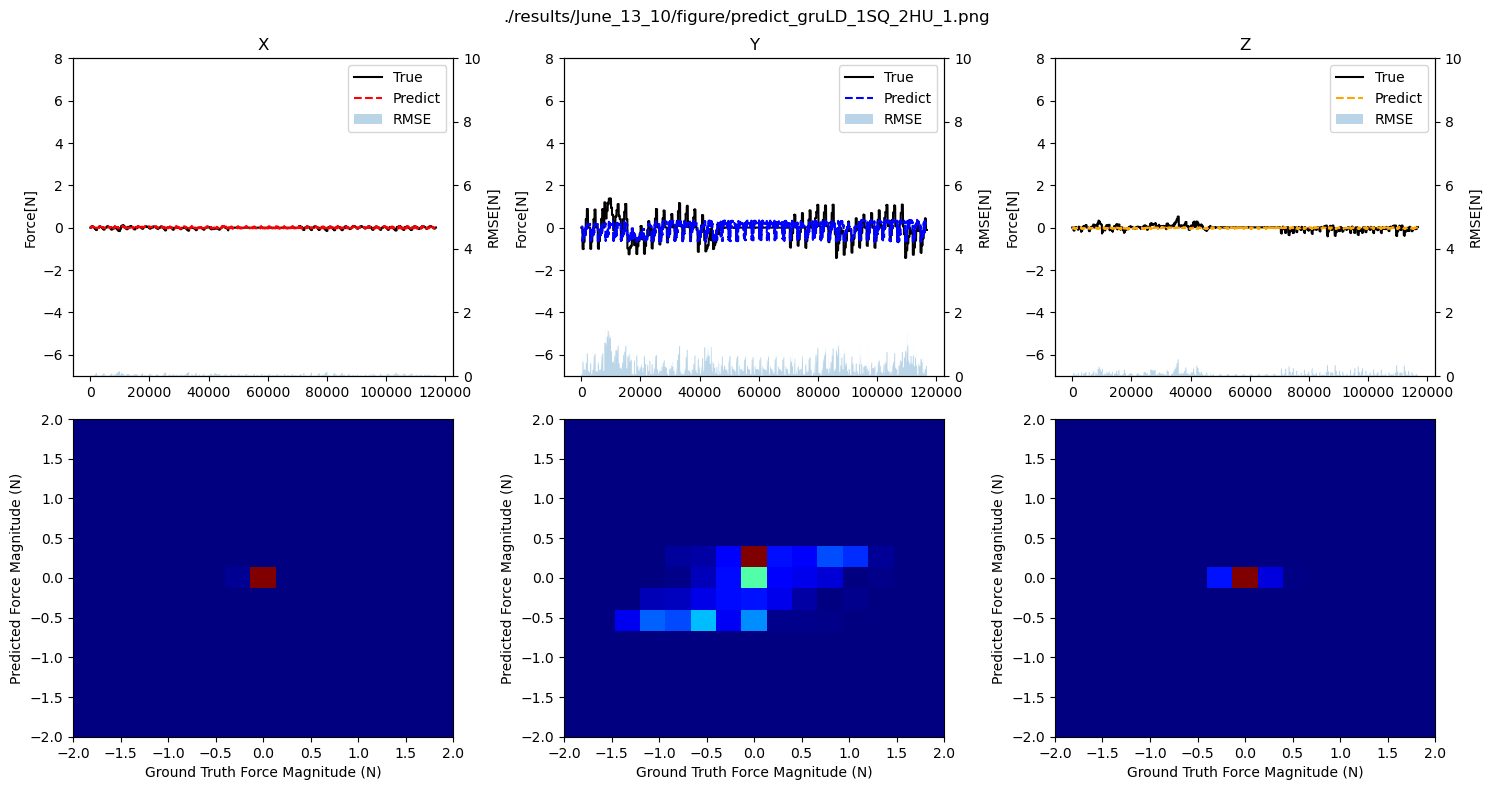

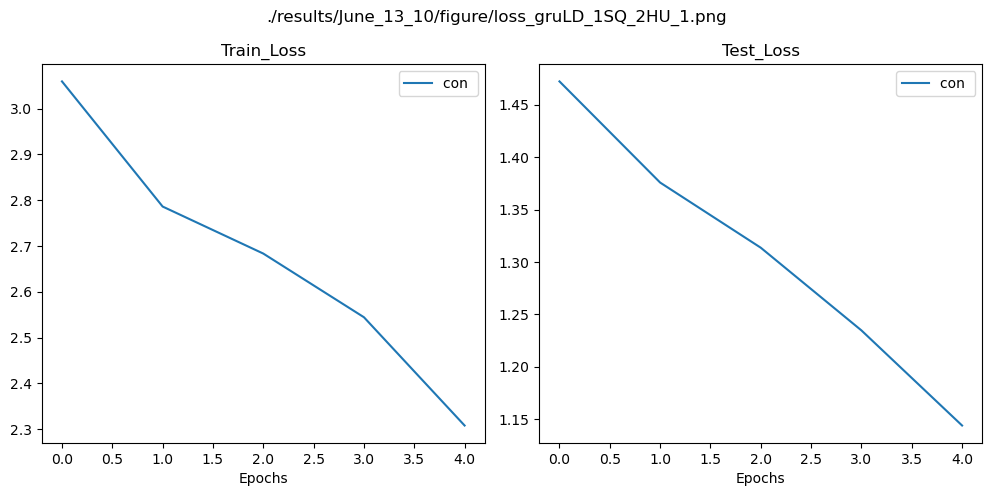

C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.5953 | test_loss: 1.2405 | 
Time taken : 101.08052159999988
[INFO] Saving model to: results\June_13_10\models\gruLD_1SQ_2HU_2\model.pth


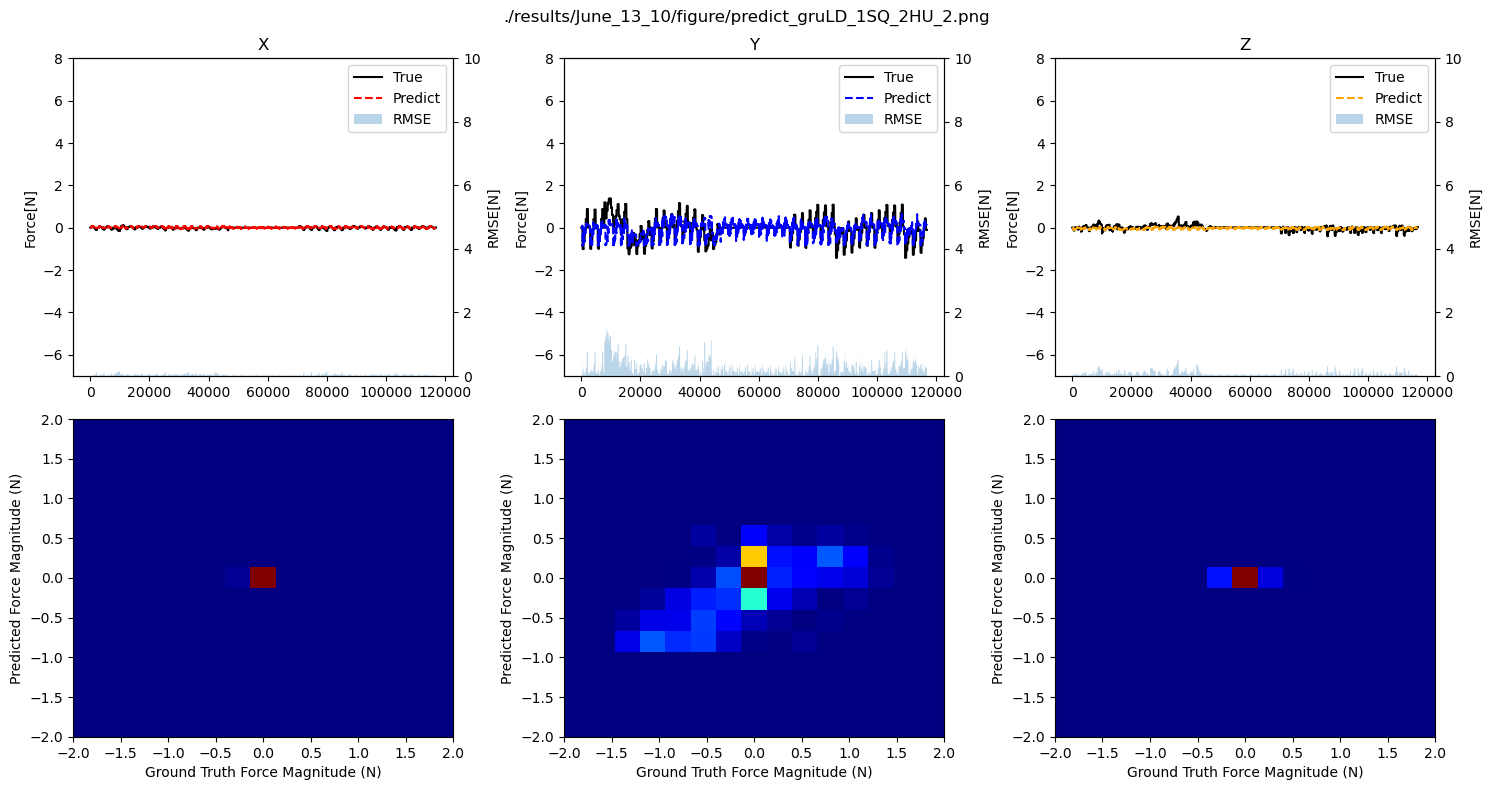

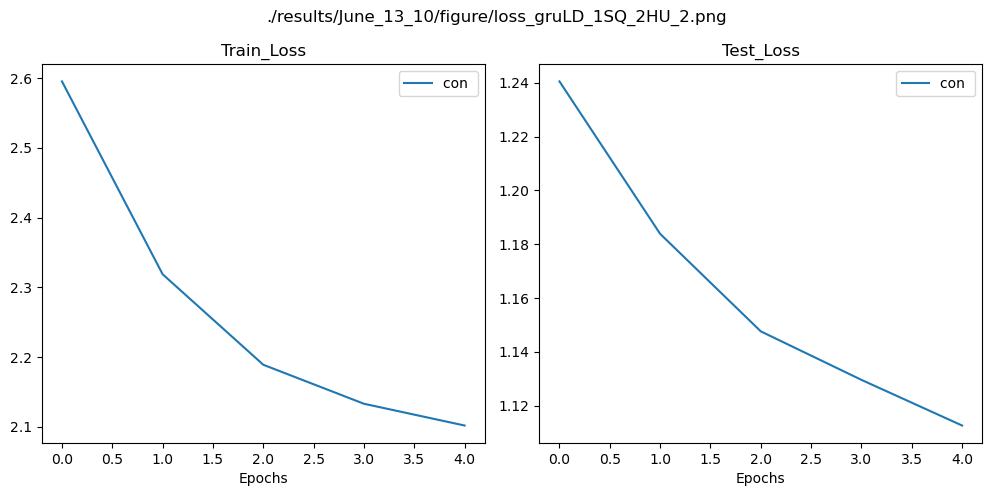

In [33]:
duration_time=[]
loss_results=[]
final_results=[]
result_rmse=[]

today_date=datetime.today().strftime('%B_%d') # folder name
counter = 1
dir_name=f"./results/{today_date}_{counter}"
while os.path.exists(dir_name):
    dir_name = dir_name=f"./results/{today_date}_{counter}"
    counter += 1
figure_dir=dir_name+'/figure'
model_dir=dir_name+'/models'
scaler_dir=dir_name+'/scaler'

os.makedirs(dir_name,exist_ok=True)
os.makedirs(figure_dir,exist_ok=True)
os.makedirs(model_dir,exist_ok=True)
os.makedirs(scaler_dir,exist_ok=True)

dscrpt=1

# Hyper parameters
#LAYER_DIM1=[32,64,128] 

LAYER_DIM1=[1] # 
#Sequential_L1=[32,64,128] #
Sequential_L1=[2]
NUM_EPOCHS = 5
BATCH_SIZE = 128
#HIDDEN_UNITS1 = [32,64,128]
HIDDEN_UNITS1 = [1,2]
LEARNING_RATE = 0.001
Dropout_prob=0.2
model_name=['gru']
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_d= Tr_Data
test_d= Te_Data
total_feature= r_feature# rl_feature, r_feature, l_feature

    
for i in range(len(LAYER_DIM1)):
    for j in range(len(Sequential_L1)):
        for k in range(len(HIDDEN_UNITS1)):
            for l in range(len(model_name)):
                HIDDEN_UNITS=HIDDEN_UNITS1[k]
                LAYER_DIM=LAYER_DIM1[i]
                Sequential_L=Sequential_L1[j]
                name=model_name[l]+"LD_"+str(LAYER_DIM)+"SQ_"+str(Sequential_L)+"HU_"+str(HIDDEN_UNITS)
                prediction_figure_name=figure_dir+'/predict_'+name+'.png'
                loss_function_figure_name=figure_dir+'/loss_'+name+'.png'



                Y_tr=np.array(train_d.filter(items=For_col))
                X_tr=np.array(train_d.filter(items=total_feature)) ## important part

                #X_tr_scaler = sklearn.preprocessing.StandardScaler()
                #Y_tr_scaler = sklearn.preprocessing.StandardScaler()
                X_tr_scaler = sklearn.preprocessing.RobustScaler()
                Y_tr_scaler = sklearn.preprocessing.RobustScaler()
                #X_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #Y_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #X_scaler = sklearn.preprocessing.MinMaxScaler()
                #Y_scaler = sklearn.preprocessing.MinMaxScaler()



                Y_te=np.array(test_d.filter(items=For_col))
                X_te=np.array(test_d.filter(items=total_feature)) ## important part



                X_test=torch.FloatTensor(X_tr_scaler.fit_transform(X_te))
                Y_test=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_te))



                X_train=torch.FloatTensor(X_tr_scaler.fit_transform(X_tr))
                Y_train=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_tr))






                train_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
                test_dataset=DataLoader(utils.Data(X_test,Y_test,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)


                Input_dim=len(X_train[0])
                Output_dim=len(Y_train[0])
                if dscrpt == '1d':
                    if model_name[l]=='mpl':
                        if Sequential_L!=1:
                            continue
                        model = SimpleNN(input_size=Input_dim,
                                    hidden_size=HIDDEN_UNITS,
                                    layer_dim = LAYER_DIM,
                                    output_size=Output_dim,
                                    dropout_prob=0.2  
                                    )
                        '''
                        model = MLP(input_dim=Input_dim,
                                    layer_dim=LAYER_DIM, 
                                    hidden_dim=HIDDEN_UNITS,
                                    output_dim=Output_dim, 
                                    dropout_prob=0.2,
                                    activation_function=nn.ReLU())'''
                    elif model_name[l]=='lstm':
                        model = B_LSTMModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                    elif model_name[l]=='gru':
                        model = B_GRUModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                    elif model_name[l]=='rnn':
                        model = B_RNNModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                else: 
                    if model_name[l]=='mpl':
                        if Sequential_L!=1:
                            continue
                        model = SimpleNN(input_size=Input_dim,
                                    hidden_size=HIDDEN_UNITS,
                                    layer_dim = LAYER_DIM,
                                    output_size=Output_dim,
                                    dropout_prob=0.2  
                                    )

                        #model = MLP(input_dim=Input_dim,
                         #           layer_dim=LAYER_DIM, 
                          #          hidden_dim=HIDDEN_UNITS,
                           #         output_dim=Output_dim, 
                            #        dropout_prob=0.2,
                             #       activation_function=nn.ReLU())
                    elif model_name[l]=='lstm':
                        model = LSTMModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)
                    elif model_name[l]=='gru':
                        model = GRUModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)
                    elif model_name[l]=='rnn':
                        model = RNNModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)


                model.to(device)


                # Set loss and optimizer
                loss_fn = torch.nn.MSELoss() ## change
                optimizer = torch.optim.Adam(model.parameters(), ## change
                                             lr=LEARNING_RATE)
                # Train
                #torchinfo.summary(model,(5,5,5))
                start_time = timer()
                results=engine.train(model=model,
                             train_dataloader=train_dataset,
                             test_dataloader=test_dataset,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             epochs=NUM_EPOCHS,
                             device=device)
                end_time = timer()

                print(f'Time taken : {end_time-start_time}')
                loss_results.append(results)
                Pred_Values=Y_tr_scaler.inverse_transform(utils.predict(model,test_dataset,device).to('cpu'))
                True_Values=Y_tr_scaler.inverse_transform(Y_test)
                result_rmse.append( rmse(Pred_Values,True_Values))
                utils.save_model(model=model,
                                 target_dir=model_dir+'/'+name,
                                 model_name="model.pth")
                plot_prediction(Pred_Values,True_Values,2,save_flag=True,save_name=prediction_figure_name )
                plot_loss_curves(results,single_flag=True,save_flag=True, save_name=loss_function_figure_name)
                model_scaler=scaler_dir+'/'+name
                os.makedirs(model_scaler)
                joblib.dump(X_tr_scaler, model_scaler+"/X_scaler.save") 
                joblib.dump(Y_tr_scaler, model_scaler+"/Y_scaler.save") 
